In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [2]:
BATCH_SIZE=32
IMAGE_SIZE=256 #image size will be 256x256
CHANNELS=2 #we will use rgb image for this dataset
EPOCHS=20

In [5]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "./../Dataset/train",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)  

Found 1800 files belonging to 2 classes.


In [6]:
classes_name=dataset.class_names
classes_name

['maniola_jurtina', 'pyronia_tithonus']

In [7]:
def get_dataset_partition(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    assert(train_split+val_split+test_split) ==1
    ds_size=len(ds)

    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)

    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)

    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)

    return train_ds,val_ds,test_ds

In [8]:
train_ds,val_ds,test_ds=get_dataset_partition(dataset)

In [9]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [10]:
for image_batch,labels_batch in dataset.take(1):
    print(image_batch[0].numpy())
    print(image_batch[0].numpy().shape)

[[[  9.         22.          2.       ]
  [  9.         22.          2.       ]
  [  9.         22.          2.       ]
  ...
  [ 44.76758    63.23242     1.4648438]
  [ 45.         63.          1.       ]
  [ 45.         63.          1.       ]]

 [[  9.         22.          2.       ]
  [  9.         22.          2.       ]
  [  9.         22.          2.       ]
  ...
  [ 44.76758    63.23242     1.4648438]
  [ 45.         63.          1.       ]
  [ 45.         63.          1.       ]]

 [[  9.         22.          2.       ]
  [  9.         22.          2.       ]
  [  9.         22.          2.       ]
  ...
  [ 45.713608   64.24881     2.0704117]
  [ 46.16211    64.39453     1.9296875]
  [ 46.16211    64.39453     1.9296875]]

 ...

 [[160.        171.30273   108.92969  ]
  [160.        171.30273   108.92969  ]
  [161.4599    175.15721   107.3681   ]
  ...
  [196.0118    211.20644   170.77948  ]
  [190.2539    207.48633   162.55664  ]
  [190.2539    207.48633   162.55664  ]]

 [

In [11]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [12]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [22]:
input_shape = (256, 256, 3)
n_classes = 2  # Replace with the actual number of classes in your problem

model = models.Sequential([
    layers.Input(shape=input_shape),
    resize_and_rescale,
    
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])


model.build(input_shape=input_shape)

In [23]:
from tensorflow.keras import layers, models, optimizers

# Compile the model
model.compile(optimizer=optimizers.Adam(lr=0.001),
              loss='sparse_categorical_crossentropy',  # Change to categorical_crossentropy if using one-hot encoded labels
              metrics=['accuracy'])

In [24]:
history=model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=5
)

Epoch 1/5
45/45 [==============================] - 243s 5s/step - loss: 0.6883 - accuracy: 0.5261 - val_loss: 0.6514 - val_accuracy: 0.6938
Epoch 2/5
45/45 [==============================] - 224s 5s/step - loss: 0.5948 - accuracy: 0.6963 - val_loss: 0.7680 - val_accuracy: 0.5250
Epoch 3/5
45/45 [==============================] - 219s 5s/step - loss: 0.5836 - accuracy: 0.7090 - val_loss: 0.5032 - val_accuracy: 0.7688
Epoch 4/5
45/45 [==============================] - 226s 5s/step - loss: 0.5400 - accuracy: 0.7338 - val_loss: 0.5512 - val_accuracy: 0.8125
Epoch 5/5
45/45 [==============================] - 180s 4s/step - loss: 0.5421 - accuracy: 0.7309 - val_loss: 0.4917 - val_accuracy: 0.7812


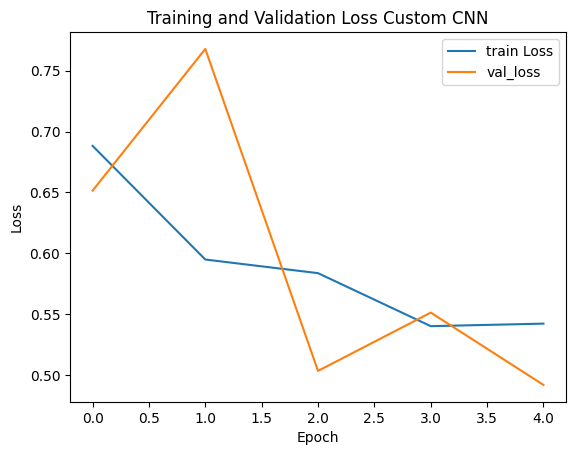

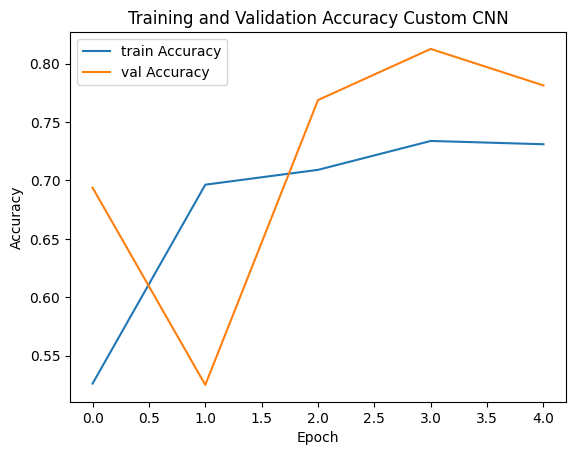

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train Loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Custom CNN')
plt.savefig('./../Images/loss_plot_model2.png')
plt.show()

# Plot and save the accuracy plot
plt.plot(history.history['accuracy'], label='train Accuracy')
plt.plot(history.history['val_accuracy'], label='val Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Custom CNN')
plt.savefig('./../Images/accuracy_plot_model2.png')
plt.show()